In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [5]:
# build vocab of chars and mapping to/from integers
chars = sorted(list(set(''.join(words))))
chars.insert(0, '.') # start of word or end of word indicator
stoi = {s:i for i, s in enumerate(chars)}
itos = {i:s for i, s in enumerate(chars)}
print(stoi)
print('-')
print(itos)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
-
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [9]:
# build the dataset
block_size = 3
X, Y = [], []
for w in words[:5]:
    
    print(w)
    context = [0] * block_size
    
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        
        print(''.join([itos[i] for i in context]), '--->', itos[ix])
        
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)


emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [10]:
# The analog of the embedding matrix C in Bengio's 2003 paper
# Andrej has a 27 x 2 embbedding matrix C:
# We have 27 chars that would be embedded into a 2 dimensional space
C = torch.randn((27, 2))

In [11]:
C[5]

tensor([-1.4453, -0.1452])

In [14]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.4453, -0.1452])

In [15]:
X.shape

torch.Size([32, 3])

In [18]:
X[13]

tensor([0, 0, 1])

In [19]:
X[13, 2]

tensor(1)

In [20]:
C[X[13, 2]]

tensor([0.2768, 0.6167])

In [23]:
X[13, :]

tensor([0, 0, 1])

In [24]:
C[X[13, :]]

tensor([[0.0464, 0.0783],
        [0.0464, 0.0783],
        [0.2768, 0.6167]])

In [25]:
C = torch.randn((27, 2))

In [26]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [27]:
emb[1,:]

tensor([[-0.8982,  1.2300],
        [-0.8982,  1.2300],
        [-0.3343, -0.3078]])

In [28]:
X[1]

tensor([0, 0, 5])

In [29]:
C[0]

tensor([-0.8982,  1.2300])

In [30]:
C[5]

tensor([-0.3343, -0.3078])

In [47]:
# tanh layer
# 3 chars need input
# each char is embedded in a 2-d space
# tanh layer would have 3 chars * 2 dims for each char = 6 inputs
tanh_num_neurons = 100
W1 = torch.randn((6, tanh_num_neurons))
b1 = torch.randn(100)

In [37]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.3343, -0.3078],
        [-0.8982,  1.2300, -0.3343, -0.3078, -0.4922, -0.0225],
        [-0.3343, -0.3078, -0.4922, -0.0225, -0.4922, -0.0225],
        [-0.4922, -0.0225, -0.4922, -0.0225,  0.6520,  1.5433],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.2321, -0.3332],
        [-0.8982,  1.2300, -0.2321, -0.3332,  0.5643, -1.1148],
        [-0.2321, -0.3332,  0.5643, -1.1148, -0.1203,  0.7315],
        [ 0.5643, -1.1148, -0.1203,  0.7315,  0.5909, -0.2604],
        [-0.1203,  0.7315,  0.5909, -0.2604, -0.1203,  0.7315],
        [ 0.5909, -0.2604, -0.1203,  0.7315,  0.6520,  1.5433],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300,  0.6520,  1.5433],
        [-0.8982,  1.2300,  0.6520,  1.5433,  0.5909, -0.2604],
        [ 0.6520,  1.5433,  0.5909, -0.2

In [39]:
emb[3, 0], emb[3, 1], emb[3, 2]

(tensor([-0.3343, -0.3078]),
 tensor([-0.4922, -0.0225]),
 tensor([-0.4922, -0.0225]))

In [42]:
# same as 
torch.unbind(emb, 1)

(tensor([[-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0.3343, -0.3078],
         [-0.4922, -0.0225],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0.2321, -0.3332],
         [ 0.5643, -1.1148],
         [-0.1203,  0.7315],
         [ 0.5909, -0.2604],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [ 0.6520,  1.5433],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0.1203,  0.7315],
         [ 1.3221, -0.3323],
         [ 0.6520,  1.5433],
         [-0.8476,  0.2532],
         [-0.3343, -0.3078],
         [ 0.5643, -1.1148],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [ 1.3221, -0.3323],
         [-0.2321, -0.3332],
         [-0.5205,  0.8423],
         [ 0.7155, -0.4978]]),
 tensor([[-0.8982,  1.2300],
         [-0.8982,  1.2300],
         [-0

In [43]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.3343, -0.3078],
        [-0.8982,  1.2300, -0.3343, -0.3078, -0.4922, -0.0225],
        [-0.3343, -0.3078, -0.4922, -0.0225, -0.4922, -0.0225],
        [-0.4922, -0.0225, -0.4922, -0.0225,  0.6520,  1.5433],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.2321, -0.3332],
        [-0.8982,  1.2300, -0.2321, -0.3332,  0.5643, -1.1148],
        [-0.2321, -0.3332,  0.5643, -1.1148, -0.1203,  0.7315],
        [ 0.5643, -1.1148, -0.1203,  0.7315,  0.5909, -0.2604],
        [-0.1203,  0.7315,  0.5909, -0.2604, -0.1203,  0.7315],
        [ 0.5909, -0.2604, -0.1203,  0.7315,  0.6520,  1.5433],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300,  0.6520,  1.5433],
        [-0.8982,  1.2300,  0.6520,  1.5433,  0.5909, -0.2604],
        [ 0.6520,  1.5433,  0.5909, -0.2

In [44]:
# even better
emb.view(32, 6)

tensor([[-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.3343, -0.3078],
        [-0.8982,  1.2300, -0.3343, -0.3078, -0.4922, -0.0225],
        [-0.3343, -0.3078, -0.4922, -0.0225, -0.4922, -0.0225],
        [-0.4922, -0.0225, -0.4922, -0.0225,  0.6520,  1.5433],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.2321, -0.3332],
        [-0.8982,  1.2300, -0.2321, -0.3332,  0.5643, -1.1148],
        [-0.2321, -0.3332,  0.5643, -1.1148, -0.1203,  0.7315],
        [ 0.5643, -1.1148, -0.1203,  0.7315,  0.5909, -0.2604],
        [-0.1203,  0.7315,  0.5909, -0.2604, -0.1203,  0.7315],
        [ 0.5909, -0.2604, -0.1203,  0.7315,  0.6520,  1.5433],
        [-0.8982,  1.2300, -0.8982,  1.2300, -0.8982,  1.2300],
        [-0.8982,  1.2300, -0.8982,  1.2300,  0.6520,  1.5433],
        [-0.8982,  1.2300,  0.6520,  1.5433,  0.5909, -0.2604],
        [ 0.6520,  1.5433,  0.5909, -0.2

In [48]:
h = emb.view(32, 6) @ W1 + b1
h.shape

torch.Size([32, 100])

In [49]:
# 32 is the current, but this is just the number of training records in this codde
# to make it general:
h = emb.view(emb.shape[0], 6) @ W1 + b1

In [50]:
# mind blown - which is the same as 
h = emb.view(-1, 6) @ W1 + b1
# if yah pass -1,
# torch would infer the size of the dim 1 based on the size of dim 2

In [51]:
# since this is a tanh layer
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[-0.9980, -0.6045, -0.4873,  ..., -0.2278,  0.9991,  0.9999],
        [-0.9176, -0.8825,  0.2448,  ...,  0.9987,  0.9970,  0.9941],
        [-0.9792,  0.1335, -0.4717,  ...,  0.9975,  0.9946,  0.9936],
        ...,
        [ 0.2900,  0.6850,  0.6606,  ...,  0.1562,  0.3155, -0.4785],
        [-0.8921,  0.9659, -0.7670,  ..., -0.6231,  0.3013,  0.9944],
        [-0.9283,  0.9814, -0.5255,  ..., -1.0000, -0.0315,  0.7502]])

In [52]:
# The final layer
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [53]:
logits = h @ W2 + b2

In [54]:
logits.shape

torch.Size([32, 27])

In [55]:
counts = logits.exp()

In [57]:
prob = counts / counts.sum(1, keepdims=True)
prob

tensor([[1.3578e-08, 8.1678e-09, 7.4199e-07, 7.4944e-03, 5.1724e-12, 9.4530e-11,
         4.2767e-07, 1.2039e-06, 1.1427e-04, 9.1180e-03, 6.2666e-05, 3.5412e-09,
         3.7401e-09, 6.3107e-01, 7.3018e-10, 3.6571e-04, 2.3724e-06, 2.8013e-09,
         3.0692e-04, 1.1620e-11, 3.7818e-10, 4.7292e-07, 3.3836e-09, 4.3355e-03,
         7.7262e-05, 3.3758e-01, 9.4714e-03],
        [1.8296e-10, 7.9467e-10, 2.0334e-11, 4.0646e-04, 1.1205e-09, 2.1957e-13,
         2.8853e-09, 1.3468e-07, 9.0695e-06, 3.9383e-04, 9.3872e-13, 1.7401e-07,
         8.4134e-05, 9.9711e-01, 1.0331e-07, 2.6706e-04, 5.6064e-07, 1.1274e-09,
         7.5727e-06, 1.8478e-12, 1.3900e-07, 2.9797e-07, 5.2086e-10, 2.2994e-07,
         4.0125e-07, 1.7176e-03, 2.7188e-06],
        [9.2150e-08, 1.1597e-07, 1.4586e-08, 4.1025e-09, 1.5919e-07, 7.4975e-10,
         3.7752e-12, 3.0805e-08, 8.3326e-08, 3.4512e-03, 4.4541e-08, 4.5365e-03,
         3.6485e-07, 9.4643e-01, 8.9734e-06, 2.3462e-06, 3.1390e-07, 9.6871e-08,
         8.4594e-

In [61]:
prob.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [70]:
prob[torch.arange(32), Y]
prob[torch.arange(32), Y].shape

torch.Size([32])

In [66]:
prob.shape

torch.Size([32, 27])

In [67]:
Y.shape

torch.Size([32])

In [68]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [71]:
prob[torch.arange(32), Y]

tensor([9.4530e-11, 9.9711e-01, 9.4643e-01, 2.6406e-12, 6.5404e-16, 3.6571e-04,
        2.2139e-04, 6.0206e-07, 4.2048e-12, 3.9113e-06, 1.8553e-07, 8.7641e-12,
        8.1678e-09, 1.6689e-13, 2.7672e-06, 7.2677e-09, 9.1180e-03, 2.4398e-10,
        8.4365e-10, 5.6732e-06, 8.2500e-06, 8.2045e-01, 6.5425e-04, 2.3887e-10,
        1.2213e-09, 1.1620e-11, 4.8882e-06, 7.6601e-11, 5.9194e-10, 6.7618e-01,
        4.6116e-07, 1.7097e-11])

In [74]:
# loss
# negative log likelihood
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(16.1888)

In [166]:
# Clean it and put it together
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [167]:
sum(p.nelement() for p in parameters)

3481

In [168]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(emb.shape[0]), Y].log().mean()
# the above two are softmax and cross-entropy loss (maybe same as softmax loss?)
# so we can replace with:
loss = F.cross_entropy(logits, Y)
loss

tensor(19.5052)

In [169]:
for p in parameters:
    p.requires_grad = True

In [161]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [174]:
batch_size = 32
lri = []
lossi = []

for i in range(10000):
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (batch_size, ))
    
    # forward pass
    # emb = C[X] # (num_records, 3, 2)
    emb = C[X[ix]] # (batch_size, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # loss = F.cross_entropy(logits, Y)
    loss = F.cross_entropy(logits, Y[ix])
    if i % 999 == 0:
        print(loss.item())
        
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    #lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
     
    # track stats
#     lri.append(lr)
#     lossi.append(loss.item())

print(loss.item())  

3.097024917602539
2.4696292877197266
2.653510808944702
2.534458637237549
2.298844337463379
2.437410593032837
2.218479633331299
2.407728433609009
2.589233875274658
2.0494625568389893
2.324988842010498
2.2063794136047363


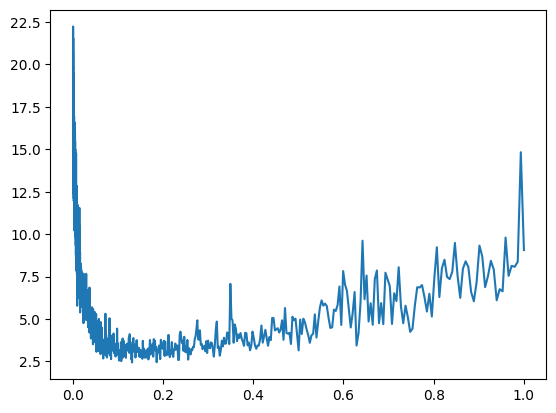

In [163]:
plt.plot(lri, lossi)

In [101]:
logits.argmax(1), Y

(tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [107]:
# let's build the entire dataset
# same as before - but all the words and no prints
block_size = 3
X, Y = [], []
for w in words:
    
    context = [0] * block_size
    
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)       
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)
        

In [175]:
print(C.shape)
print(X.shape)
emb = C[X]
print(emb.shape)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(loss)

torch.Size([27, 2])
torch.Size([228146, 3])
torch.Size([228146, 3, 2])
tensor(2.3658, grad_fn=<NllLossBackward0>)
